# Coding Exercises (Part 4)

## Time Series Data

### Exercise 17: Financial Time Series

Now, you will have the opportunity to analyze your own dataset. <br>
__Follow the instructions__ and insert your code! You are either requested to 
- Complete the Code and __Fill in the gaps__. Gaps are marked with "__---__" and are __placeholders__ for your code fragment. 
- Write Code completely __on your own__ 

In some exercises, you will find questions that can only be answered, if your code is correct and returns the right output! The correct answer is provided below your coding cell. There you can check whether your code is correct.

If you need a hint, check the __Hints Section__ at the end of this Notebook. Exercises and Hints are numerated accordingly.

If you need some further help or if you want to check your code, you can also check the __solutions notebook__.

### Have Fun!

--------------------------------------------------------------------------------------------------------------

## Option 1: Self_guided

Import the us stocks dataset (__us_stocks.csv__) and select the Adjusted Close (__Adj Close__) for all six stocks from __31-12-2015__ (incl.) until __31-12-2018__ (incl.). Save the DataFrame in the variable __stocks__ and work through the next questions with this DataFrame!

__Visualize__ the Adjusted Close of the six stocks __over time__!

__Visualize__ the Adjusted Close of the six stocks __over time__, starting each at the __Base Value 100__!

Calculate __monthly returns__ for all six stocks and create a new __returns__ DataFrame!

Calculate the __annualized mean return__ and the __annualized standard deviation__ of returns for all six stocks!

__Visualize risk/return__ of all six stocks in a (total) risk / return framework. (annualized std on the x-axis, annualized mean returns on the y-axis). <br>
Identify the __best performing__ stock and the __worst performing__ stock (in terms of __risk / return__)

__Reindex__ the DataFrame __stocks__ with all __365 calander days of 2018__. Fill NaN Values!

__Ticker Symbols__:
- AXP : American Express
- FB : Facebook
- INTC : Intel
- MCD : McDonalds 
- PG : Procter & Gamble
- WMT: Walmart

------------------------

## Option 2: Guided and Instructed

# STOP HERE, IF YOU WANT TO DO THE EXERCISE ON YOUR OWN!

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

In [13]:
#run the cell!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8")

154. __Import__ daily stock price data (__us_stocks.csv__) and __insepct__! Handle the __MultiIndex__! __Fill in the gaps__!

In [14]:
stocks = pd.read_csv("us_stocks.csv", header = [0,1], index_col= [0], parse_dates= [0])

In [15]:
# run the cell!
stocks.head()

Open                                                  \
                  AXP  FB       INTC        MCD         PG        WMT   
Date                                                                    
2009-12-31  40.900002 NaN  20.600000  62.970001  61.520000  54.250000   
2010-01-04  40.810001 NaN  20.790001  62.630001  61.110001  53.740002   
2010-01-05  40.830002 NaN  20.940001  62.660000  61.130001  54.090000   
2010-01-06  41.230000 NaN  20.809999  62.200001  60.939999  53.500000   
2010-01-07  41.259998 NaN  20.730000  61.250000  60.580002  53.720001   

                 High                        ...  Adj Close             \
                  AXP  FB       INTC    MCD  ...       INTC        MCD   
Date                                         ...                         
2009-12-31  41.080002 NaN  20.719999  63.07  ...  15.252899  47.055138   
2010-01-04  41.099998 NaN  21.030001  63.07  ...  15.611791  47.311375   
2010-01-05  41.230000 NaN  20.990000  62.75  ...  15.604316  46.949627   
2010-01-06  41.669998 NaN  20.930000  62.41  ...  15.551979  46.309067   
2010-01-07  42.240002 NaN  20.760000  62.34  ...  15.402434  46.648193   

                                    Volume                                   \
                   PG        WMT       AXP  FB      INTC       MCD       PG   
Date                                                                          
2009-12-31  45.146072  42.548668   4030500 NaN  26429200   4495300  5942200   
2010-01-04  45.510941  43.169579   6894300 NaN  47800900   5839300  9190800   
2010-01-05  45.525822  42.739723  10641200 NaN  52357700   7099000  8649400   
2010-01-06  45.309883  42.644184   8399400 NaN  40037400  10551300  9908400   
2010-01-07  45.064171  42.668079   8981700 NaN  54041500   7517700  8972800   

                      
                 WMT  
Date                  
2009-12-31   9764800  
2010-01-04  20753100  
2010-01-05  15648400  
2010-01-06  12517200  
2010-01-07  10662700  

[5 rows x 36 columns]

Ticker Symbols:
- AXP : American Express
- FB : Facebook
- INTC : Intel
- MCD : McDonalds 
- PG : Procter & Gamble
- WMT: Walmart

155. __Select__ the Adjusted Close (__Adj Close__) for all six stocks from __31-12-2015__ (incl.) until __31-12-2018__ (incl.)! __Overwrite__ stocks! <br>
__How many Timestamps__ / Days are now in the DataFrame?

In [16]:
stocks = stocks.loc["2015-12-31":"2018-12-31", "Adj Close"]

In [17]:
# run the cell!
stocks.head()

,AXP,FB,INTC,MCD,PG,WMT
Date,,,,,,
2015-12-31,65.910294,104.660004,31.437597,108.968636,71.450706,56.722713
2016-01-04,64.052849,102.220001,31.017828,108.452126,70.514938,56.870766
2016-01-05,63.067310,102.730003,30.871820,109.946350,70.739891,58.221748
2016-01-06,61.315948,102.970001,30.187403,109.208458,70.056053,58.804699
2016-01-07,60.763893,97.919998,29.055828,106.681190,69.444221,60.174198


In [18]:
# run the cell!
stocks.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 754 entries, 2015-12-31 to 2018-12-28
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AXP     754 non-null    float64
 1   FB      754 non-null    float64
 2   INTC    754 non-null    float64
 3   MCD     754 non-null    float64
 4   PG      754 non-null    float64
 5   WMT     754 non-null    float64
dtypes: float64(6)
memory usage: 41.2 KB


We have ... 754 Days.

156. __Plot__ stocks (figsize (12, 8)!

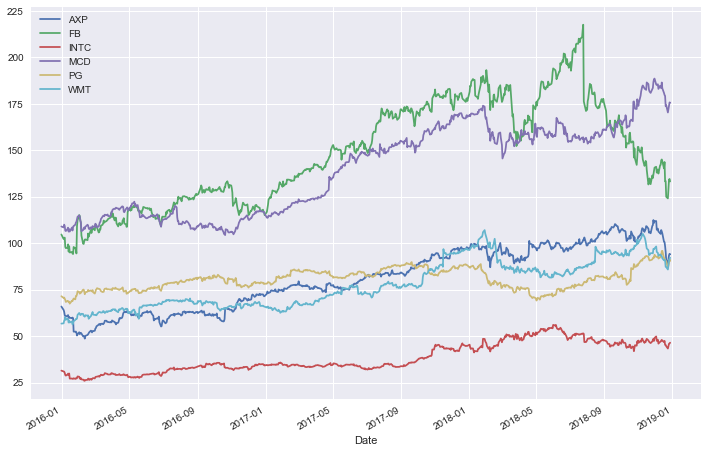

In [19]:
stocks.plot(figsize = (12,8))
plt.show()

157. __Bring__ the six stocks to the __same Base__ (100) and __plot__ again! __Fill in the gaps!__

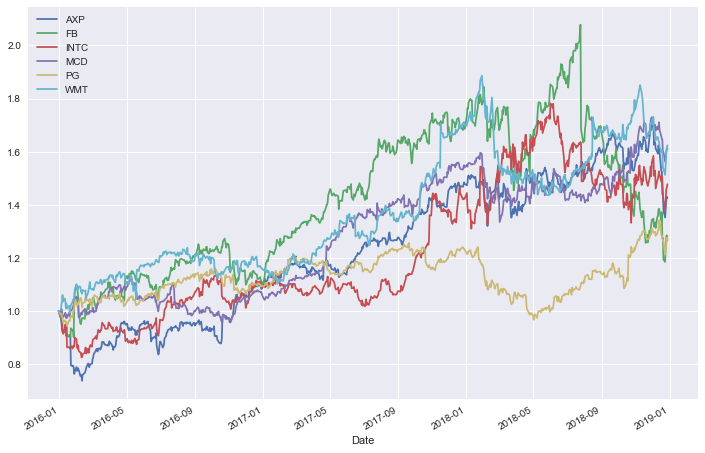

In [20]:
stocks.div(stocks.iloc[0]).plot(figsize = (12,8))
plt.show()

Still hard to compare performance, right?

158. __Resample__ stocks to __monthly__ frequency (__last__ trading price of each month)! __Save__ resampled Dataframe in the variable __stocks_m__!

In [21]:
stocks_m = stocks.resample("BM").last()

In [22]:
# run the cell!
stocks_m.head()

,AXP,FB,INTC,MCD,PG,WMT
Date,,,,,,
2015-12-31,65.910294,104.660004,31.437597,108.968636,71.450706,56.722713
2016-01-29,50.922123,112.209999,28.307537,114.170799,74.142738,61.404896
2016-02-29,52.901901,106.919998,27.240244,108.911270,72.872086,61.386375
2016-03-31,58.441471,114.099998,29.781067,116.801506,74.705444,63.844990
2016-04-29,62.578789,117.580002,27.875446,117.554268,73.313026,62.334877


159. Calculate __monthly returns__ and __save__ the result in the variable __ret__! (drop NaN Values!)

In [23]:
ret = stocks_m.pct_change().dropna()

In [24]:
#run the cell!
ret

,AXP,FB,INTC,MCD,PG,WMT
Date,,,,,,
2016-01-29,-0.227403,0.072138,-0.099564,0.047740,0.037677,0.082545
2016-02-29,0.038879,-0.047144,-0.037703,-0.046067,-0.017138,-0.000302
2016-03-31,0.104714,0.067153,0.093275,0.072446,0.025159,0.040051
2016-04-29,0.070794,0.030500,-0.063988,0.006445,-0.018639,-0.023653
2016-05-31,0.005044,0.010461,0.052274,-0.035022,0.011483,0.066221
2016-06-30,-0.071383,-0.038128,0.038303,-0.006845,0.044793,0.031647
2016-07-29,0.060895,0.084529,0.062805,-0.022353,0.018781,-0.000685
2016-08-31,0.017375,0.017589,0.037351,-0.009274,0.020096,-0.014265
2016-09-30,-0.023483,0.017047,0.051825,-0.002594,0.027947,0.009518


160. Calculate __mean__ and  __standard deviation__ of monthly returns! __Save__ the result in the variable __summary__!<br>
__Fill in the gaps!__

In [25]:
summary = ret.describe().T.iloc[:, [1,2]]

In [26]:
#run the cell!
summary

,mean,std
AXP,0.012162,0.065456
FB,0.008656,0.063183
INTC,0.012559,0.058963
MCD,0.014179,0.041817
PG,0.007358,0.039945
WMT,0.014997,0.054054


161. __Annualize__ mean and standard deviation of returns! __Fill in the gaps!__

In [27]:
summary["mean"] = summary["mean"]*12
summary["std"] = summary["std"]*np.sqrt(12)

In [28]:
#run the cell!
summary

,mean,std
AXP,0.145942,0.226748
FB,0.103868,0.218871
INTC,0.150712,0.204255
MCD,0.170144,0.144859
PG,0.088297,0.138374
WMT,0.179962,0.187247


162. __Plot__ and __compare__ the performance of the six stocks in a __(total) risk / return__ framework! __Fill in the gaps__! <br>
Can you identify the __best performing__ stock and the __worst performing__ stock (in terms of __risk / return__)?

c:\Users\Przemo\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


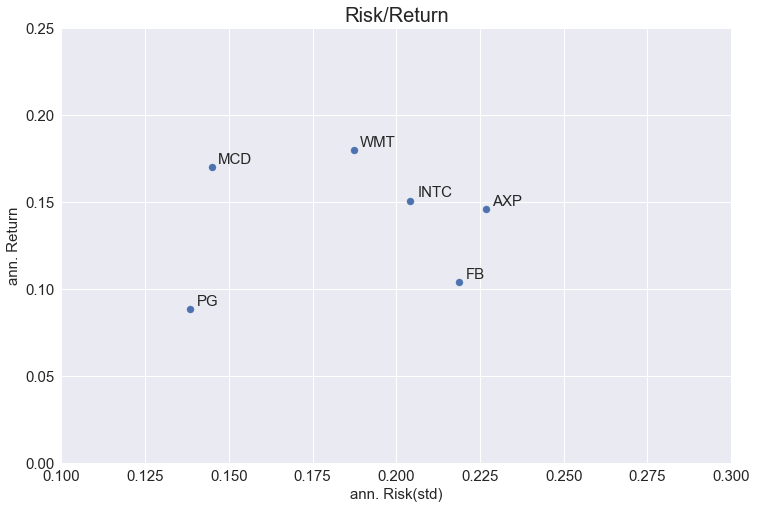

In [29]:
summary.plot(kind = "scatter", x = "std", y = "mean", figsize = (12, 8), s = 50, fontsize = 15, xlim = (0.1, 0.3), ylim = (0, 0.25))
for i in summary.index:
    plt.annotate(i, xy=(summary.loc[i, "std"]+0.002, summary.loc[i, "mean"]+0.002), size = 15)
plt.xlabel("ann. Risk(std)", fontsize = 15)
plt.ylabel("ann. Return", fontsize = 15)
plt.title("Risk/Return", fontsize = 20)
plt.show()

In a (total) risk / return framework, McDonalds (most likely) showed the best performance and facebook the worst performance!

Next, let´s return a DataFrame with stock price information for __all 365 days__ in the year __2018__.

163. First, create a __new DatetimeIndex__ (year_2018) with __all 365 days__/timestamps in the year __2018__!

In [30]:
year_2018 = pd.date_range(start = "2018-01-01", end = "2018-12-31",  freq = "D")

In [31]:
# run the cell!
year_2018

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07', '2018-01-08',
               '2018-01-09', '2018-01-10',
               ...
               '2018-12-22', '2018-12-23', '2018-12-24', '2018-12-25',
               '2018-12-26', '2018-12-27', '2018-12-28', '2018-12-29',
               '2018-12-30', '2018-12-31'],
              dtype='datetime64[ns]', length=365, freq='D')

In [32]:
# run the cell!
stocks.head()

,AXP,FB,INTC,MCD,PG,WMT
Date,,,,,,
2015-12-31,65.910294,104.660004,31.437597,108.968636,71.450706,56.722713
2016-01-04,64.052849,102.220001,31.017828,108.452126,70.514938,56.870766
2016-01-05,63.067310,102.730003,30.871820,109.946350,70.739891,58.221748
2016-01-06,61.315948,102.970001,30.187403,109.208458,70.056053,58.804699
2016-01-07,60.763893,97.919998,29.055828,106.681190,69.444221,60.174198


164. Second, __reindex__ the stocks DataFrame accordingly! Use the most appropriate __method__ to __fill NaNs__!

In [ ]:
stocks.reindex(year_2018, method = "ffill")

# Well Done!

-------------------

# Hints (Spoiler!)

154. The first two rows (index pos. 0 & 1) form the Columns MultiIndex. The Column with Datetime information is at index pos. 0.

155. stocks = stocks.loc["31-12-2015":"31-12-2018", "Adj Close"]

156. plot() method


157. div() method, plot() method

158. resample() method, last() method, use "BM" (month end business day)

159. pct_change() method, dropna() method

160. describe() method

161. *12 and *np.sqrt(12)

162. scatterplot, std and mean

163. pd.date_range() method

164. reindex() method, ffill